In [1]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

/Users/cypheon/.local/share/virtualenvs/pyspice-notebook-JSLbnKOc/lib/python3.7/site-packages/PySpice/Logging/Logging.py:47: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  logging_config = yaml.load(open(logging_config_file_name, 'r'))


In [3]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Probe.Plot import plot

In [4]:
# define a small circuit in code, you could also read a file and load the netlist from a string (see below)
circ = Circuit('small test')

circ.R('1', 1, 2, 10@u_kOhm)
circ.C('2', 2, 0, 100@u_nF)
circ.PieceWiseLinearVoltageSource('vin', 1, 0, [(0@u_ms, 0@u_V), (10@u_ms, 0@u_V), (11@u_ms, 5@u_V), (20@u_ms, 5@u_V)])

PieceWiseLinearVoltageSource Vvin

In [5]:
# check the generated netlist
netlist = str(circ)
print(netlist)

.title small test
R1 1 2 10kOhm
C2 2 0 100nF
Vvin 1 0 PWL(0ms 0V 10ms 0V 11ms 5V 20ms 5V r=0s td=0.0s)



In [6]:
# re-parse the stringified netlist into a netlist again
parser = SpiceParser(source=netlist)
parsed_circuit = parser.build_circuit()

In [7]:
# this netlist output string should be equivalent to the one above
print(str(parsed_circuit))

.title small test
R1 1 2 10kOhm
C2 2 0 100nF
Vvin 1 0 PWL(0ms 0V 10ms 0V 11ms 5V 20ms 5V r=0s td=0.0s)



In [8]:
# create a simulator
sim = circ.simulator()

# perform the analysis (and time it)
%time analysis = sim.transient(100@u_us, 50@u_ms)

<ESC>2020-04-02 20:21:27,600<ESC> - <ESC>PySpice.Spice.NgSpice.Shared.NgSpiceShared.new_instance<ESC> - <ESC>INFO<ESC> - New instance for id 0
<ESC>2020-04-02 20:21:27,650<ESC> - <ESC>PySpice.Spice.NgSpice.Shared.NgSpiceShared._init_ngspice<ESC> - <ESC>WARNING<ESC> - Unsupported Ngspice version 31
<ESC>2020-04-02 20:21:27,656<ESC> - <ESC>PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char<ESC> - <ESC>ERROR<ESC> - Warning: vvin: no DC value, transient time 0 value used
CPU times: user 12.6 ms, sys: 3.56 ms, total: 16.2 ms
Wall time: 15.9 ms


<IPython.core.display.Javascript object>


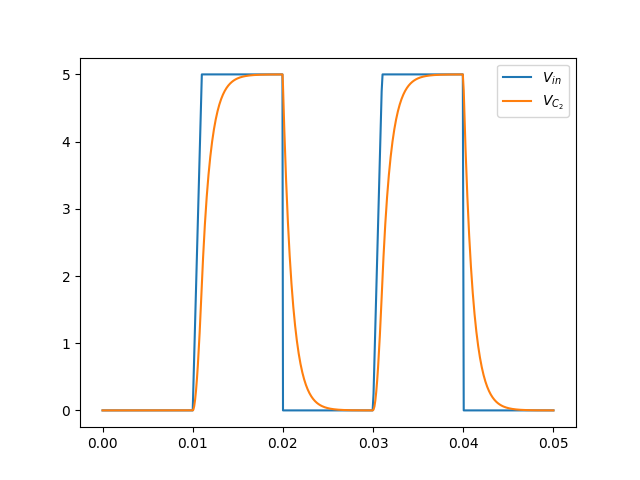

In [9]:
axe = plt.subplot()
plot(analysis['1'], label=r'$V_{in}$')
plot(analysis['2'], label=r'$V_{C_2}$')
axe.legend();